# Importing Data

In [5]:
# import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
path = r'C:\Users\Oa\Career Foundry'

In [3]:
df_department =pd.read_csv(os.path.join(path,'Data','Original',"departments.csv"), index_col = False)

In [4]:
df_ords_prods_merge = pd.read_pickle(os.path.join(path, 'Data','Prepared Data', 'merged_4.8.pkl'))

In [5]:
df_cust = pd.read_csv(os.path.join(path,'Data', 'Original', 'customers.csv'), index_col = False)

# creating a sample size

In [6]:
np.random.seed(4)
dev = np.random.rand(len(df_ords_prods_merge)) <= 0.7

In [7]:
big = df_ords_prods_merge[dev]

In [ ]:
small = df_ords_prods_merge[~dev]

In [ ]:
df_2 = small

# Wrangling Data

In [ ]:
#wrange data for customer data
df_cust_wrng= df_cust.drop(columns=['First Name', 'Surnam', 'date_joined', 'Gender'])

In [ ]:
#wrange data for merged data
df_ords_prods_wrng_2= small.drop(columns=['_merge'])

In [ ]:
print(df_ords_prods_wrng_2.shape)

(9729729, 22)


# Merging Data

In [ ]:
df_merged_data_big = df_ords_prods_wrng_2.merge(df_cust_wrng, on = 'user_id', indicator = True)

In [ ]:
df_merged_data_big.columns

Index(['order_id', 'user_id', 'order_number', 'order_dow', 'order_hour_of_day',
       'days_since_prior_order', 'product_id', 'add_to_cart_order',
       'reordered', 'product_name', 'aisle_id', 'department_id', 'prices',
       'price_range_loc', 'busiest_days', 'busiest_period_of_day', 'max_order',
       'loyalty_flag', 'mean_order', 'type_of_spender', 'frequency_median',
       'type_of_frequency', 'Age', 'n_dependants', 'fam_status', 'income',
       '_merge'],
      dtype='object')

In [ ]:
df_merged_data_big.to_pickle(os.path.join(path, 'Data', 'Prepared Data', 'Sampled_order_product_all_with_states.pkl'))

In [ ]:
busiest_period_breakdown = df_merged_data_big['busiest_period_of_day'].value_counts()
print(busiest_period_breakdown)

busiest_period_of_day
Average orders    592279
Most orders        55367
Fewest orders       1038
Name: count, dtype: int64


# Answering Questions

In [4]:
# after crash receieved lost data 
df_ords_prods_merge = pd.read_pickle(os.path.join(path, 'Data','Prepared Data', 'Sampled_order_product_all_with_states.pkl'))

In [7]:
# filter out bad data
filtered_df = df_ords_prods_merge[df_ords_prods_merge['prices'] <= 100]

In [8]:
Northeast_customer_df = filtered_df[filtered_df['STATE'].isin(['Connecticut', 'Maine', 'Massachusetts', 'New Hampshire', 'New Jersey', 'New York', 'Pennsylvania', 'Rhode Island', 'Vermont'])]
Southwest_customer_df = filtered_df[filtered_df['STATE'].isin(['Arizona', 'New Mexico', 'Oklahoma', 'Texas'])]
West_customer_df = filtered_df[filtered_df['STATE'].isin(['Alaska', 'California', 'Colorado', 'Hawaii', 'Idaho', 'Montana', 'Nevada', 'Oregon', 'Utah', 'Washington', 'Wyoming'])]
Southeast_customer_df = filtered_df[filtered_df['STATE'].isin(['Alabama', 'Arkansas', 'Delaware', 'Florida', 'Georgia', 'Kentucky', 'Louisiana', 'Maryland', 'Mississippi', 'North Carolina', 'South Carolina', 'Tennessee', 'Virginia', 'West Virginia', 'District of Columbia'])]
Midwest_customer_df = filtered_df[filtered_df['STATE'].isin(['Illinois', 'Indiana', 'Iowa', 'Kansas', 'Michigan', 'Minnesota', 'Missouri', 'Nebraska', 'North Dakota', 'Ohio', 'South Dakota', 'Wisconsin'])]

# spending habits

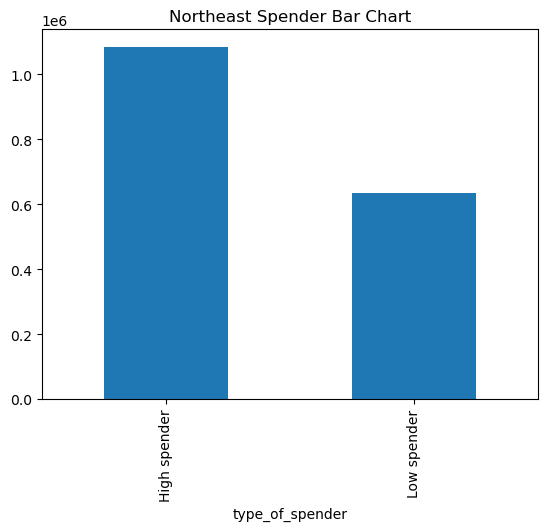

In [12]:
Northeast_spender_bar = Northeast_customer_df['type_of_spender'].value_counts().sort_index().plot.bar(title='Northeast Spender Bar Chart')

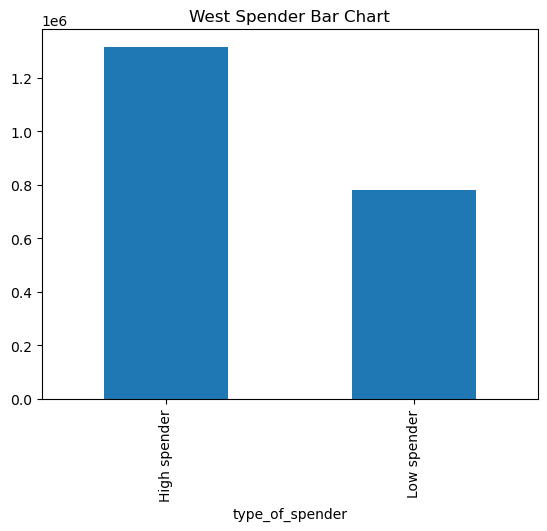

In [13]:
West_spender_bar = West_customer_df['type_of_spender'].value_counts().sort_index().plot.bar(title='West Spender Bar Chart')

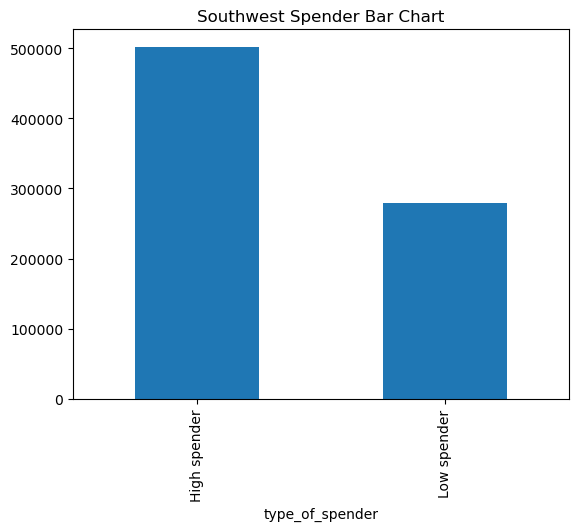

In [14]:
Southwest_spender_bar = Southwest_customer_df['type_of_spender'].value_counts().sort_index().plot.bar(title='Southwest Spender Bar Chart')

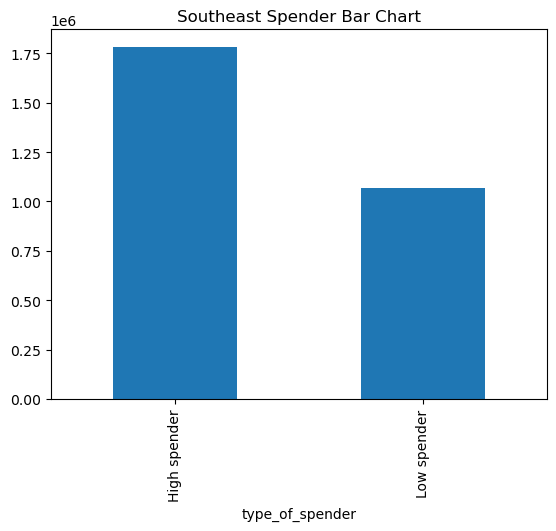

In [15]:
Southeast_spender_bar = Southeast_customer_df['type_of_spender'].value_counts().sort_index().plot.bar(title='Southeast Spender Bar Chart')

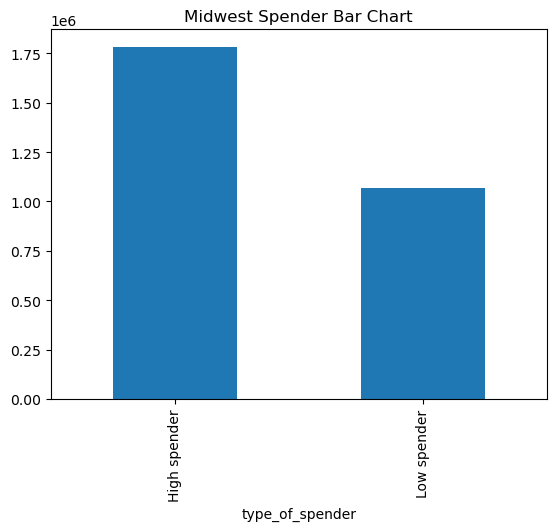

In [9]:
Midwest_spender_bar = Midwest_customer_df['type_of_spender'].value_counts().sort_index().plot.bar(title='Midwest Spender Bar Chart')

# department habits

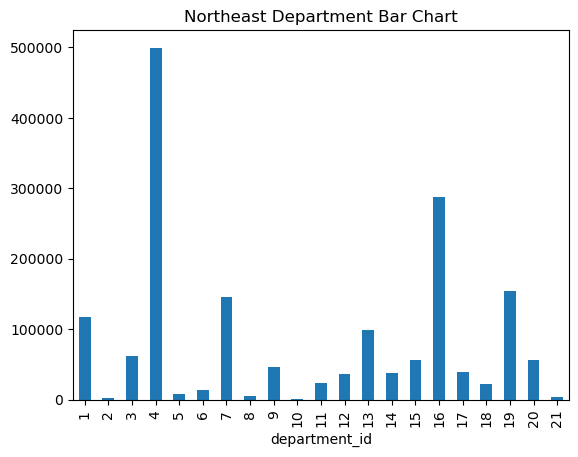

In [16]:
Northeast_department_bar = Northeast_customer_df['department_id'].value_counts().sort_index().plot.bar(title='Northeast Department Bar Chart')

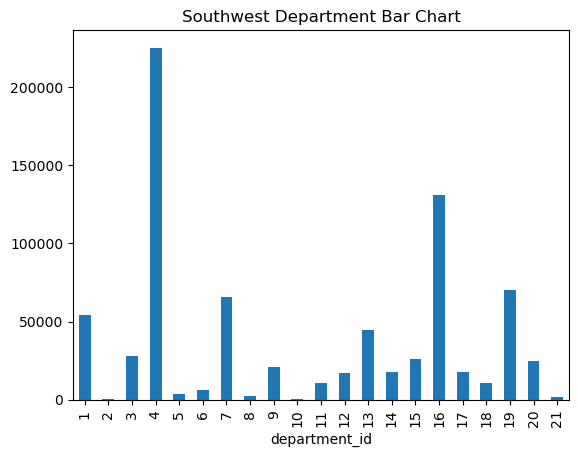

In [17]:
Southwest_department_bar = Southwest_customer_df['department_id'].value_counts().sort_index().plot.bar(title='Southwest Department Bar Chart')

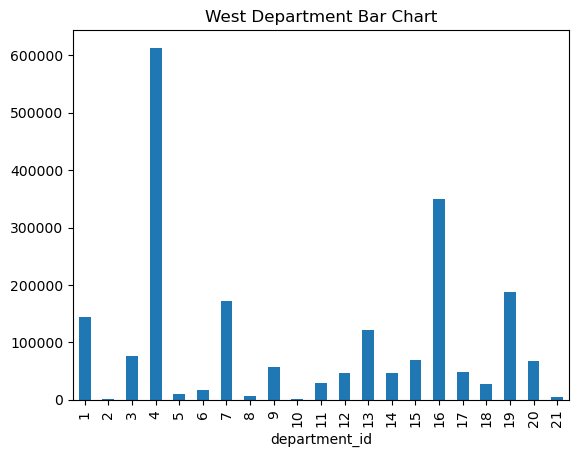

In [18]:
West_department_bar = West_customer_df['department_id'].value_counts().sort_index().plot.bar(title='West Department Bar Chart')

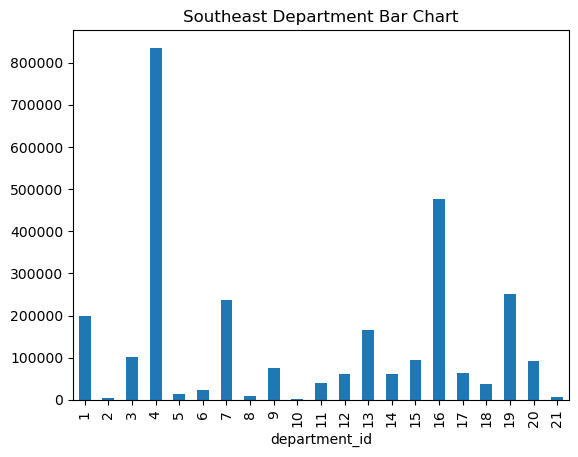

In [19]:
Southeast_department_bar = Southeast_customer_df['department_id'].value_counts().sort_index().plot.bar(title='Southeast Department Bar Chart')

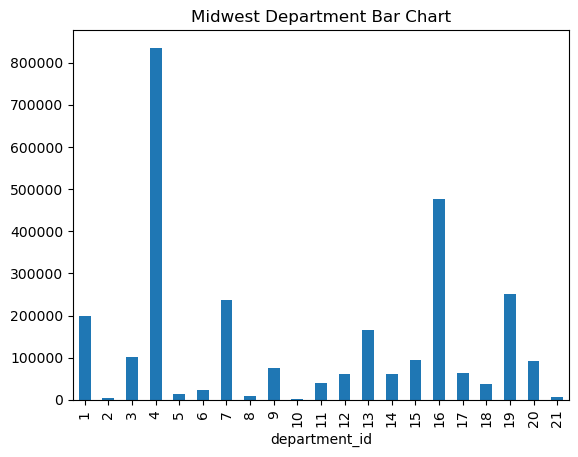

In [10]:
Midwest_department_bar = Midwest_customer_df['department_id'].value_counts().sort_index().plot.bar(title='Midwest Department Bar Chart')

In [20]:
#exporting
Northeast_department_bar.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'Region', 'Northeast_departments_bar.png'))
Northeast_spender_bar.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'Region', 'Northeast_spender_bar.png'))

Southwest_department_bar.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'Region', 'Southwest_departments_bar.png'))
Southwest_spender_bar.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'Region', 'Southwest_spender_bar.png'))

West_department_bar.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'Region', 'West_departments_bar.png'))
West_spender_bar.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'Region', 'West_spender_bar.png'))

Southeast_department_bar.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'Region', 'Southeast_departments_bar.png'))
Southeast_spender_bar.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'Region', 'Southeast_spender_bar.png'))

Midwest_department_bar.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'Region', 'Midwest_departments_bar.png'))
Midwest_spender_bar.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'Region', 'Midwest_spender_bar.png'))
